In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
gold_data = pd.read_csv("gld_price_data.csv")

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data['Time']= np.arange(len(gold_data.index))

In [10]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Time
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,0
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,1
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,2
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,3
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,4


In [12]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold')
plt.rc(
    "axes",
    labelweight="bold",
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10)

In [21]:
%config InlineBackend.figure_format = 'retina'

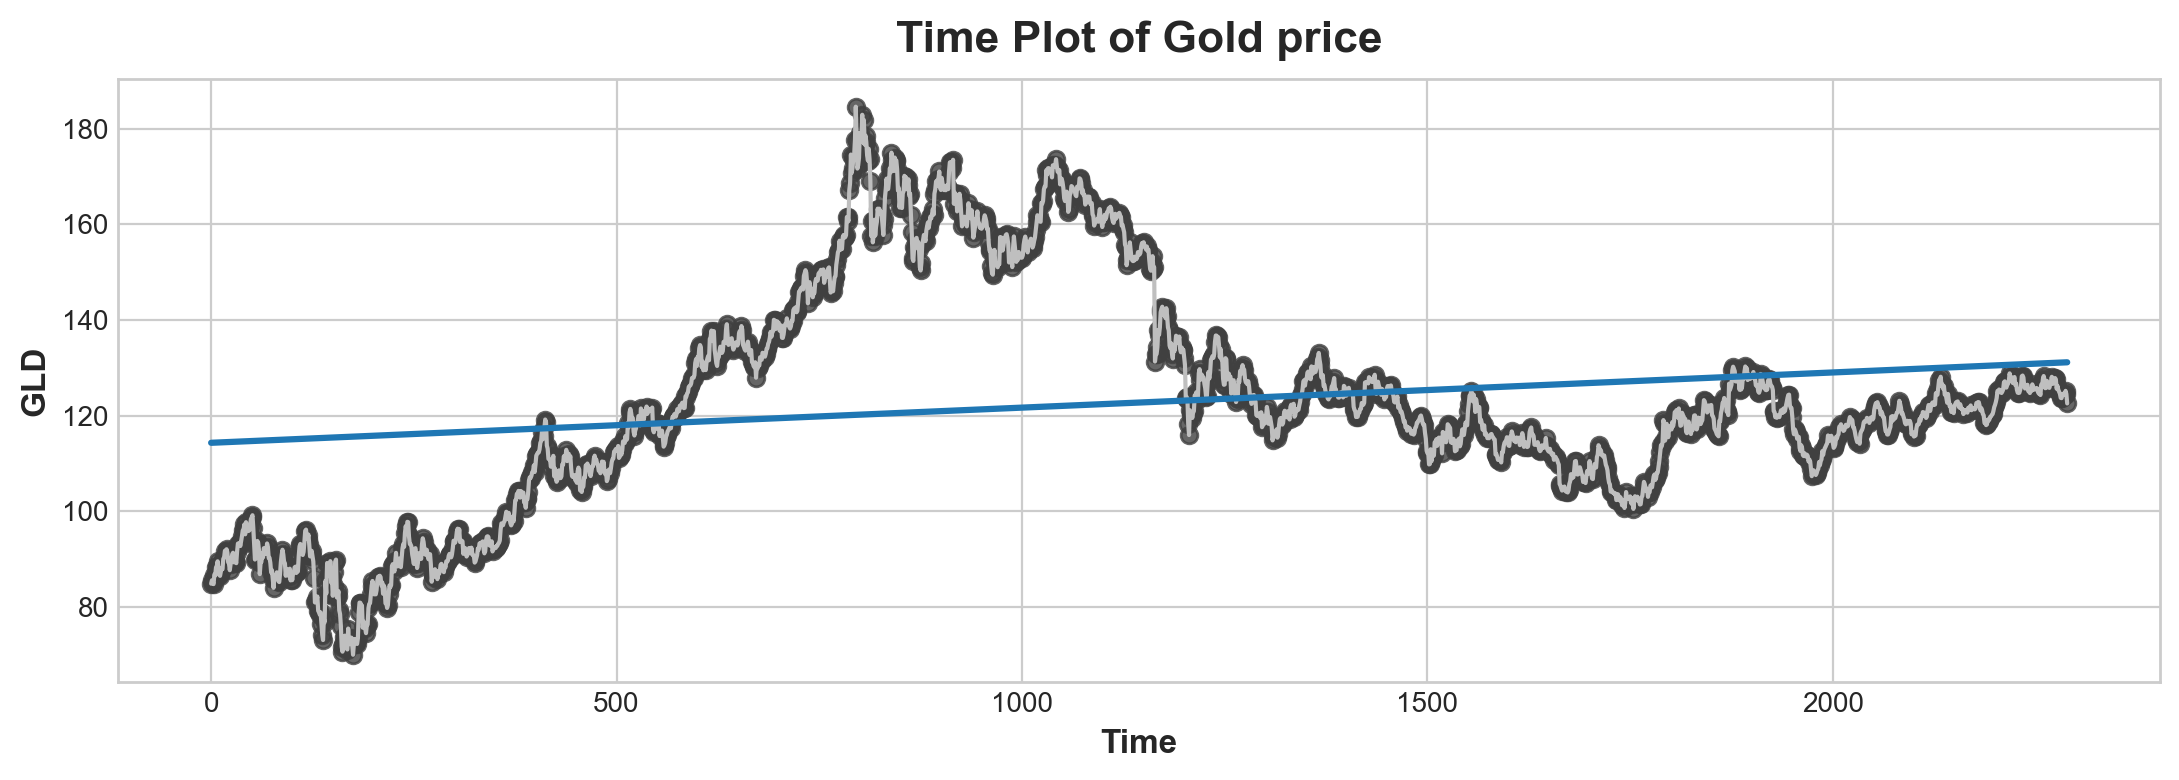

In [22]:
fig, ax = plt.subplots()
ax.plot('Time', 'GLD', data=gold_data, color='0.75')
ax = sns.regplot(x='Time', y='GLD', data=gold_data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Gold price');

In [16]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD,Time
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.00000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,1144.50000
std,519.111540,23.283346,19.523517,7.092566,0.131547,661.21038
min,676.530029,70.000000,7.960000,8.850000,1.039047,0.00000
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,572.25000
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,1144.50000
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,1716.75000
max,2872.870117,184.589996,117.480003,47.259998,1.598798,2289.00000


In [19]:
gold_data['prev_day_price'] = gold_data['GLD'].shift(1)

gold_2=gold_data.reindex(columns=['GLD', 'prev_day_price'])
gold_2.head()

,GLD,prev_day_price
0,84.860001,NaN
1,85.570000,84.860001
2,85.129997,85.570000
3,84.769997,85.129997
4,86.779999,84.769997


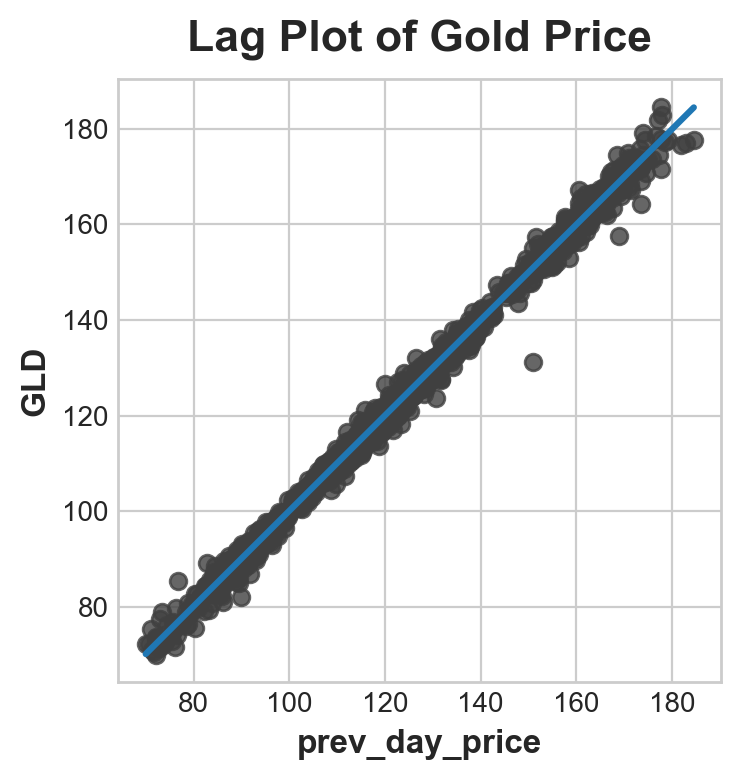

In [24]:
fig, ax = plt.subplots()
ax = sns.regplot(x='prev_day_price', y='GLD', data=gold_2, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Gold Price');

In [33]:
X= gold_2.drop(['GLD'],axis=1)
y= gold_2['GLD']
X=X.drop(0,axis=0)
y=y.drop(0,axis=0)
X.head()

,prev_day_price
1,84.860001
2,85.570000
3,85.129997
4,84.769997
5,86.779999


In [36]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=2)

In [38]:
model=LinearRegression()

In [63]:
model.fit(X_train,y_train)

LinearRegression()

In [64]:
test_data_preds=model.predict(X_test)

In [44]:
test_data_preds

array([167.80994392,  81.39664214, 110.60929321, 128.23247294,
       117.12090829, 154.05988718, 148.78288806, 128.09308159,
       116.37416356, 126.31084186, 124.21995859, 166.91384128,
       141.53448683, 169.3432538 , 122.40785803, 120.38666995,
       132.89215312, 170.17960393, 159.19747901, 173.2960236 ,
       154.56766763, 128.08311504, 177.46783951, 157.02694795,
       104.14746409,  93.51381905,  76.97591132, 119.68971118,
       118.59447959, 167.18267337,  87.63942514, 124.76757439,
        91.35323862, 121.17324206, 120.94423736, 133.74842142,
       115.29884915, 111.89369515, 133.51942368, 124.83727056,
       105.18295112,  88.09742759, 115.80663756, 116.87199338,
       159.08795645, 119.46070647, 110.56946582, 109.2452365 ,
        93.38437832, 122.80612388,  72.46557411, 115.52785385,
       120.02823247, 109.74306633, 126.45024118, 120.04814965,
       159.71522601, 161.30828742, 146.62230762,  85.95675835,
        93.82247056,  85.69789182,  91.1541027 , 120.06

In [66]:
error_score=metrics.r2_score(y_test,test_data_preds)
error_score

0.9958073947278584

<Axes: >

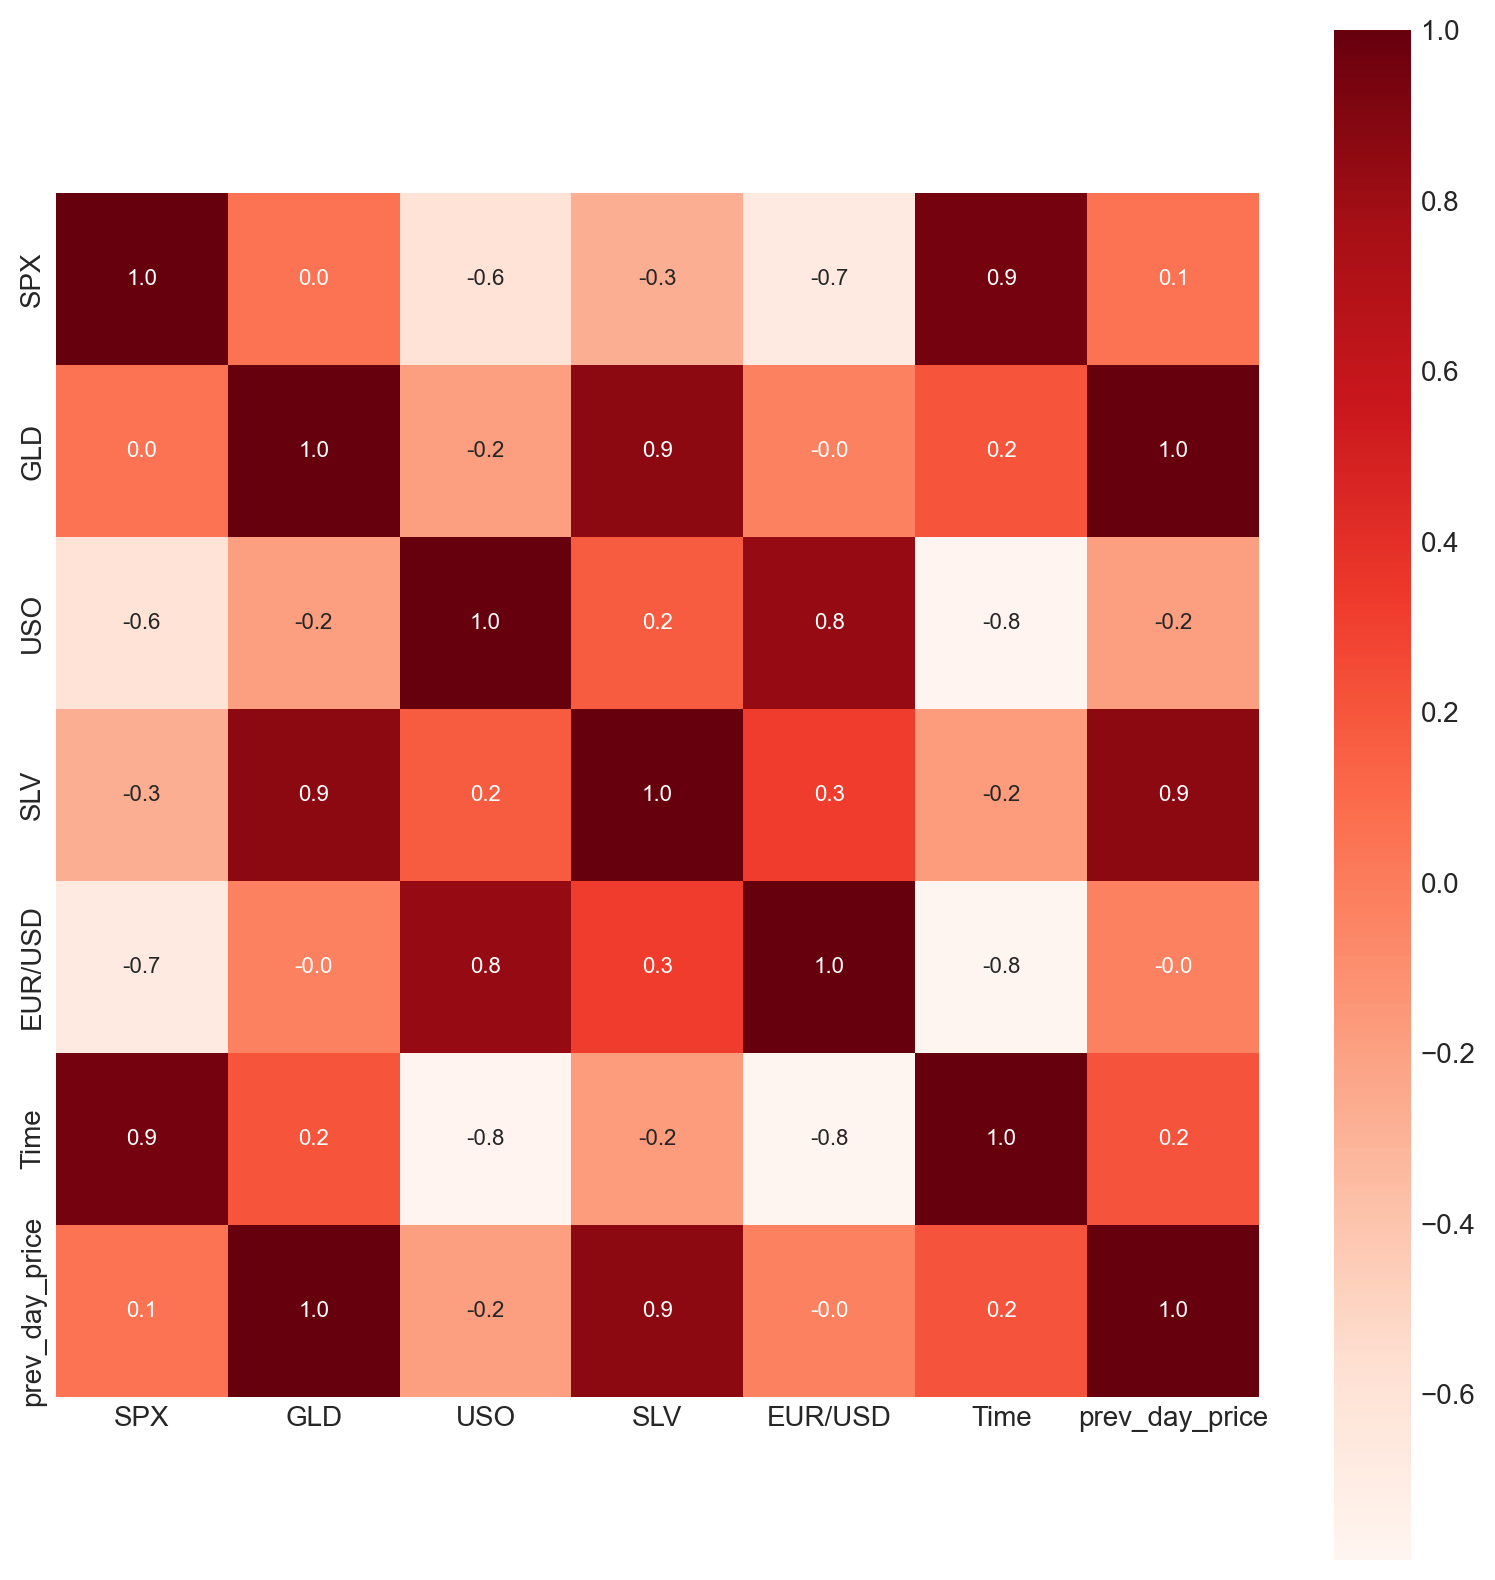

In [70]:
numeric_gold_data = gold_data.select_dtypes(include=[float, int])
correlation = numeric_gold_data.corr()
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size": 8}, cmap='Reds')

C:\Users\Krishnanand PS\AppData\Local\Temp\ipykernel_23184\81939081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

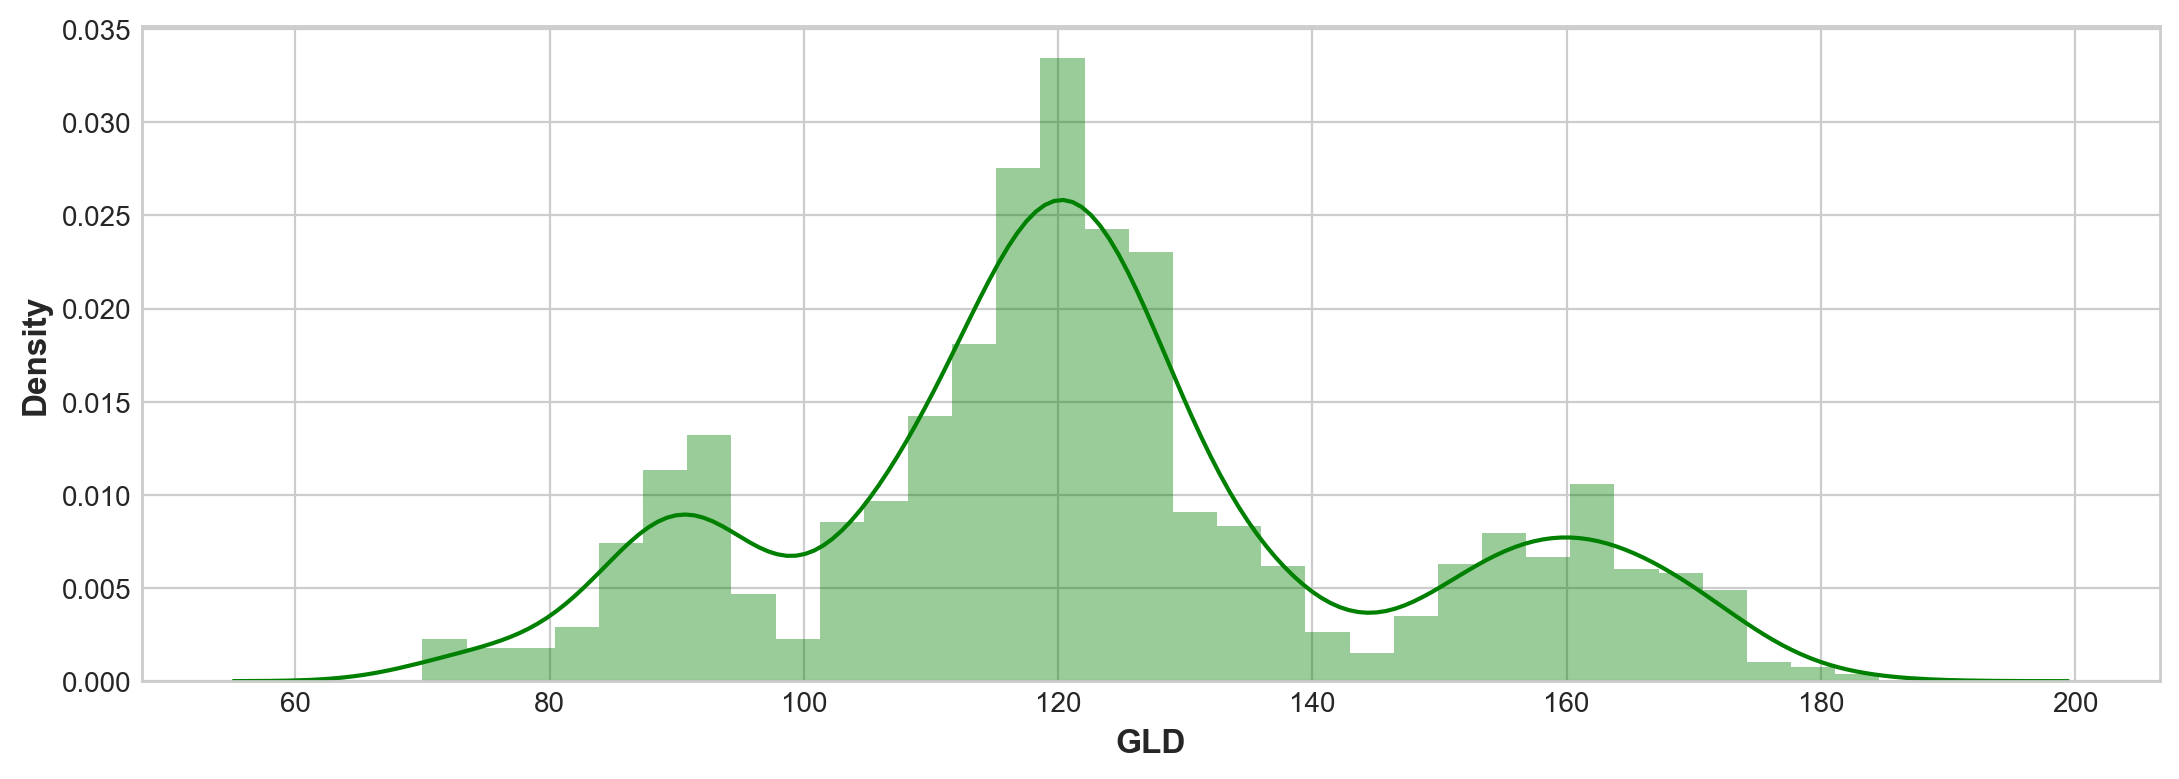

In [71]:
sns.distplot(gold_data['GLD'],color="green")